In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor

# Importing Dataset

In [2]:
partial_dfs = [ pd.read_excel("data/FinalMarksDataset.xlsx", sheet_name=i) for i in range(6) ]

In [3]:
df = pd.concat(partial_dfs)

In [4]:
df

,Unnamed: 0,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz:8,S-I,S-II,Final,Proj
0,1,61.923077,86.428571,81.666667,81.00,49.166667,78.333333,70.0,33.333333,20.00,80.0,0.0,50.0,75.000000,100.0,43.733333,15.600000,35.733333,NaN
1,2,55.769231,97.142857,43.333333,70.00,67.083333,78.888889,50.0,46.666667,0.00,100.0,70.0,100.0,83.333333,100.0,31.200000,27.466667,53.488889,NaN
2,3,86.923077,88.571429,0.000000,94.00,66.666667,88.888889,70.0,16.666667,10.00,10.0,20.0,20.0,100.000000,100.0,23.733333,16.200000,32.488889,NaN
3,4,46.923077,62.142857,0.000000,44.00,0.000000,55.555556,30.0,33.333333,5.00,0.0,0.0,20.0,25.000000,0.0,46.200000,22.466667,28.000000,NaN
4,5,80.000000,95.714286,80.555556,90.00,100.000000,100.000000,100.0,70.000000,100.00,100.0,65.0,100.0,75.000000,100.0,71.200000,43.733333,74.733333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,0.000000,0.000000,0.000000,0.00,NaN,NaN,50.0,0.000000,18.75,0.0,0.0,0.0,NaN,NaN,49.133333,18.133333,23.133333,NaN
47,48,70.500000,76.666667,73.000000,76.25,NaN,NaN,15.0,70.000000,37.50,0.0,10.0,40.0,NaN,NaN,55.000000,47.200000,62.822222,NaN
48,49,41.500000,0.000000,88.000000,90.00,NaN,NaN,60.0,20.000000,37.50,0.0,0.0,30.0,NaN,NaN,57.466667,37.200000,51.488889,NaN
49,50,32.000000,80.000000,77.000000,82.50,NaN,NaN,0.0,0.000000,43.75,60.0,25.0,0.0,NaN,NaN,47.466667,54.466667,53.733333,NaN


## Removing Index Column

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3',
       'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I', 'S-II', 'Final', 'Proj'],
      dtype='object')

# Data Description

In [7]:
df.describe()


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz:8,S-I,S-II,Final,Proj
count,254.000000,254.000000,254.000000,254.000000,152.000000,62.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,152.000000,62.000000,254.000000,254.000000,254.000000,44.000000
mean,56.766244,59.902231,64.694335,60.935499,61.901042,68.142921,46.318898,34.140420,42.244094,39.718898,36.948819,43.110236,41.584430,93.548387,44.794751,38.767192,44.245801,55.212121
std,28.112890,31.761446,26.459035,32.502959,31.665489,29.631618,31.184341,28.828967,28.025582,33.145941,30.678128,31.603579,29.327726,24.767560,17.175087,22.057860,19.122385,29.396346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.733333,0.000000,5.450000,0.000000
25%,38.000000,51.500000,53.250000,44.250000,49.166667,56.354167,16.250000,10.000000,20.000000,10.000000,10.000000,10.000000,19.791667,100.000000,31.666667,20.950000,31.743750,38.750000
50%,61.500000,72.250000,71.833333,70.000000,70.416667,76.388889,50.000000,30.000000,43.750000,35.000000,30.000000,40.000000,41.666667,100.000000,45.000000,35.800000,43.444444,65.000000
75%,80.769231,82.000000,84.166667,86.916667,87.500000,88.888889,70.000000,50.000000,60.000000,60.000000,60.000000,70.000000,58.333333,100.000000,56.200000,54.466667,57.277778,76.250000
max,99.000000,100.000000,99.166667,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.333333,100.000000,91.755556,95.000000


## Correlations

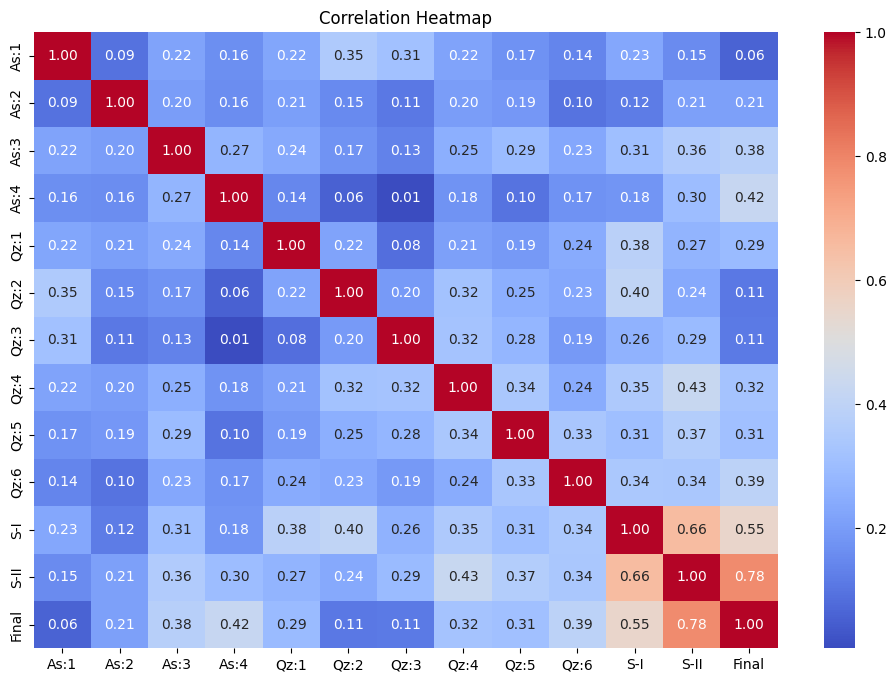

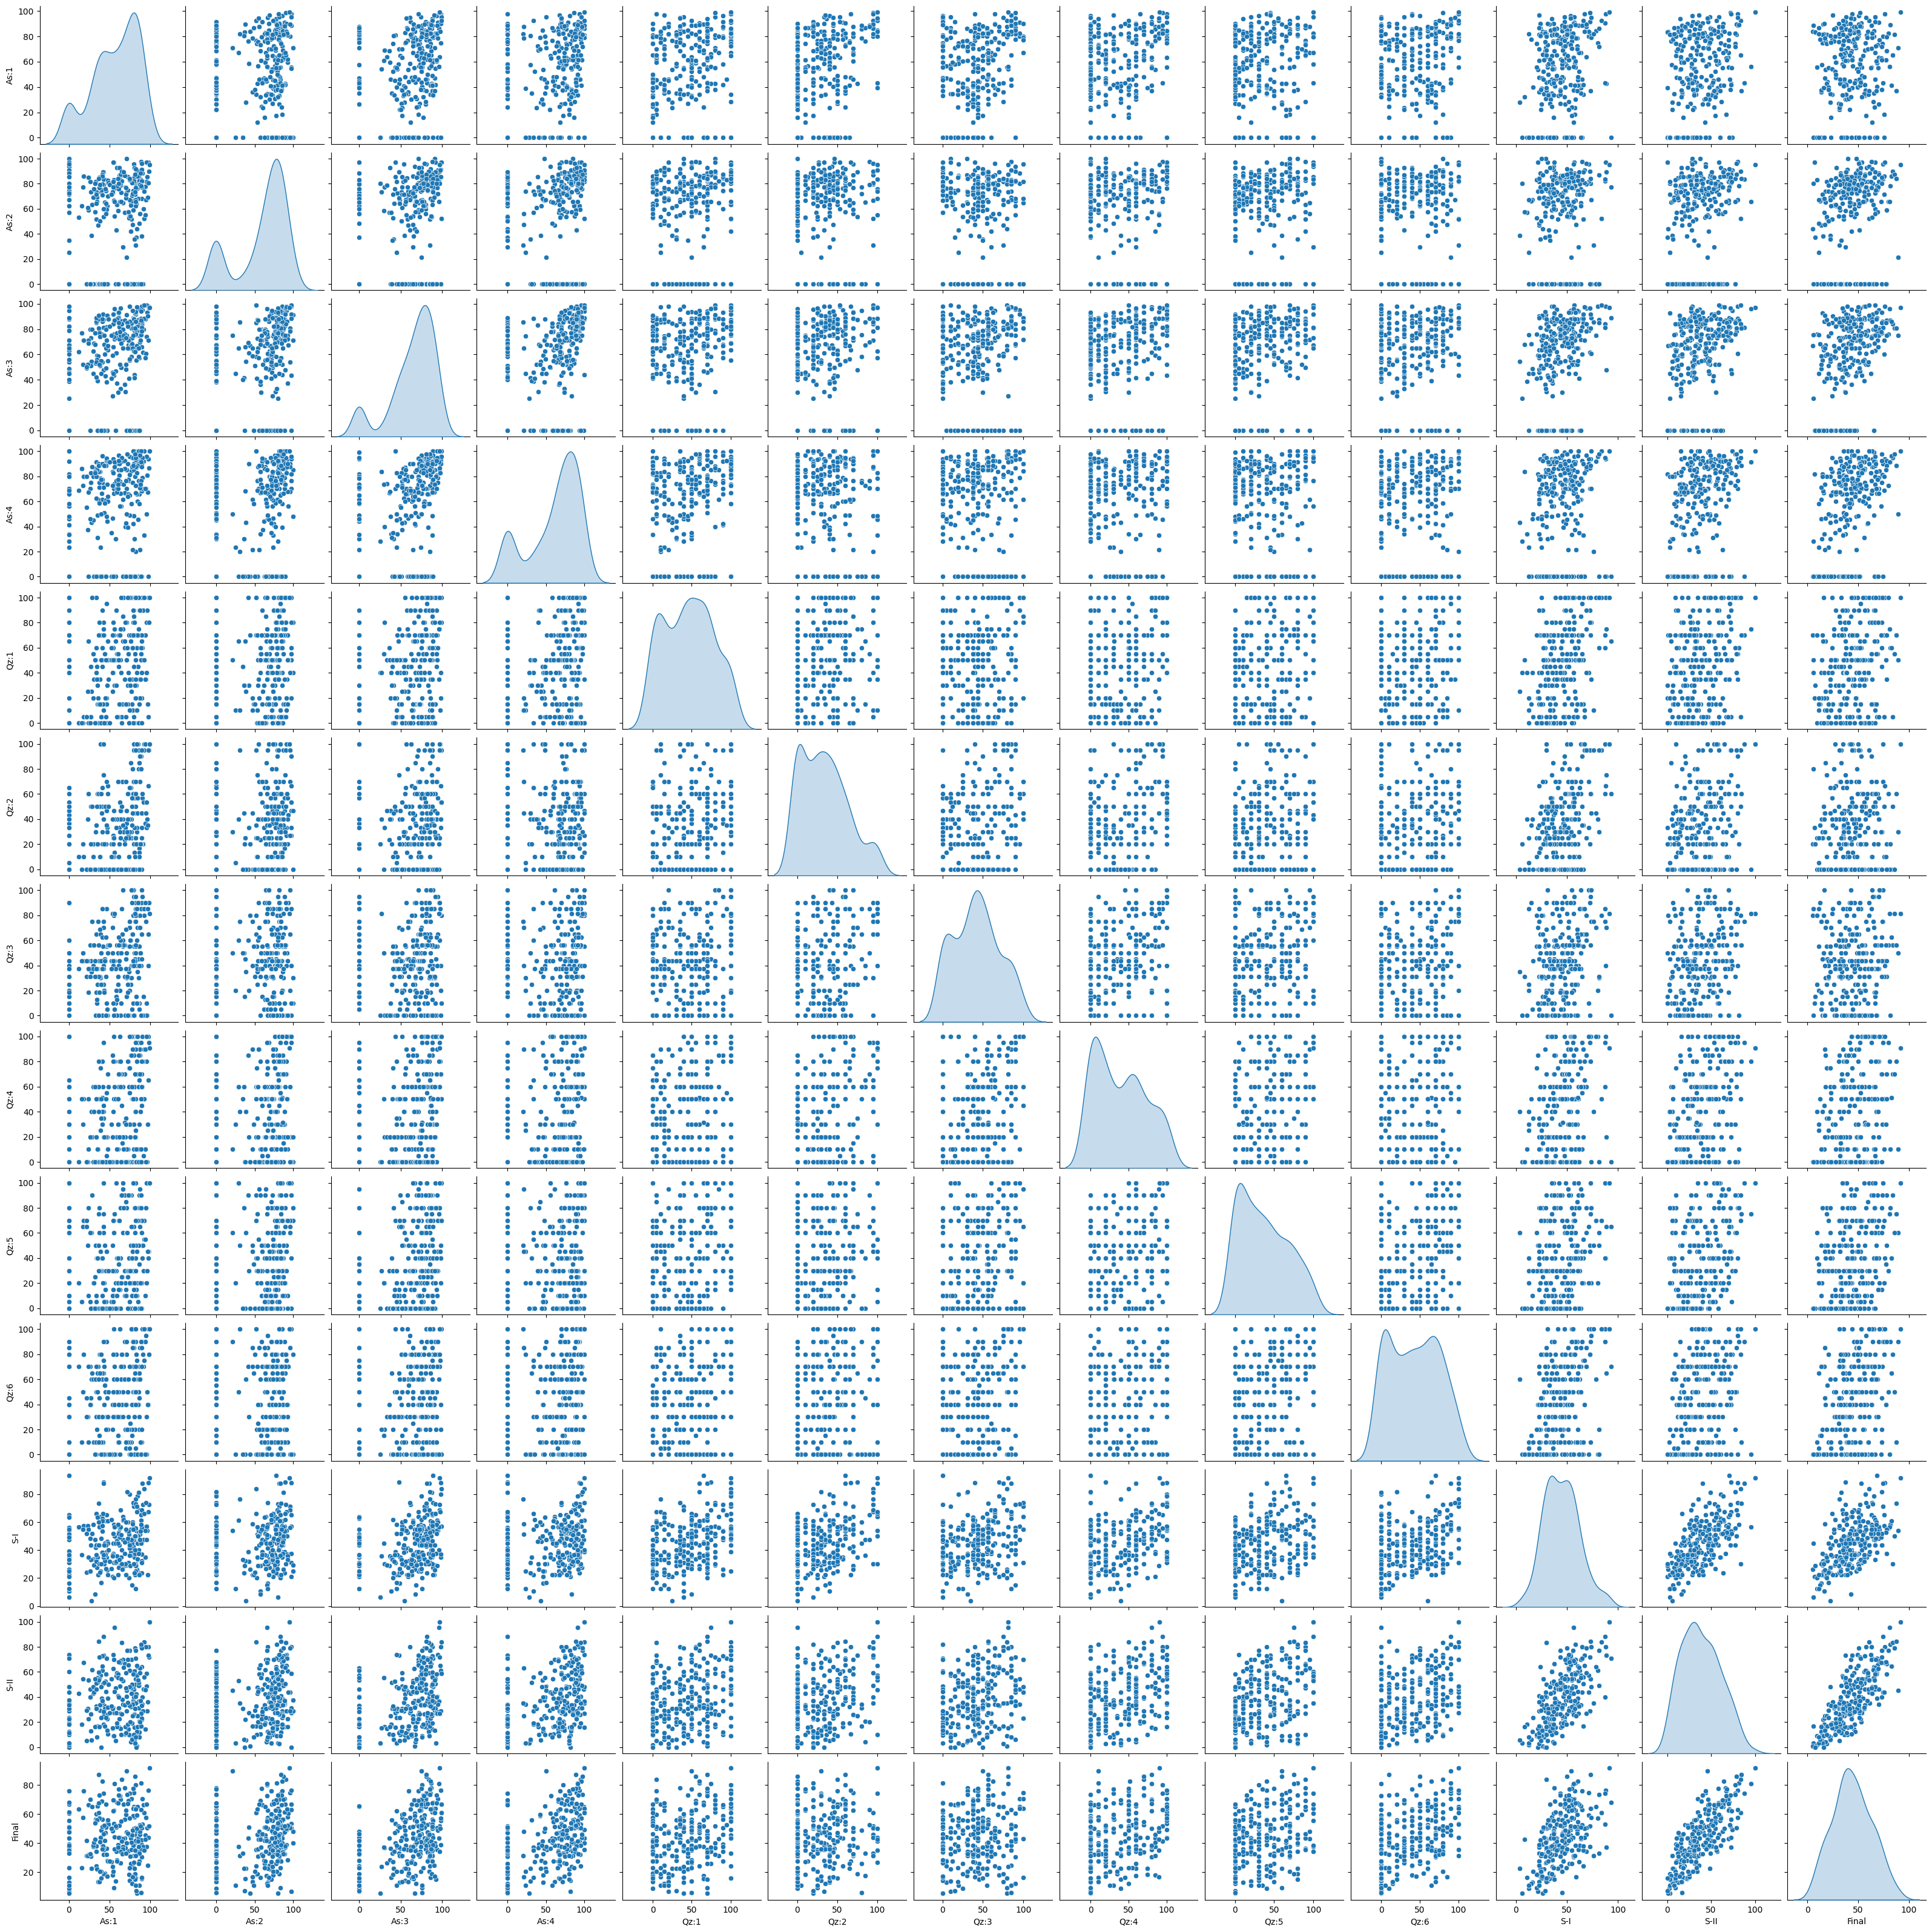

In [8]:
cols_to_use = [
    'As:1','As:2','As:3','As:4',
    'Qz:1','Qz:2','Qz:3','Qz:4','Qz:5','Qz:6',
    'S-I','S-II'
]

plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[cols_to_use + ["Final"]], diag_kind="kde")
plt.show()

## Helper Function to calculate regression matrices 

In [ ]:
# helper Function to calculate regression metrics
def calculate_metrics(y_true, y_pred, X_shape=None, dataset_name=""):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    
    if X_shape is not None:
        n = len(y_true)
        k = X_shape[1]
        if n > k + 1:
            adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
            print(f"Adjusted R2: {adj_r2:.4f}")
    
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

# RQ1: Predicting Midterm I (S-I) Marks

For this case, we will assume that we have 2 Quizzes and 2 Assignments. 

In [10]:
df_rq1 = df.dropna(subset=['S-I']).copy()
print(f"Dataset size for RQ1: {len(df_rq1)} rows")
print(f"Features available before Midterm I: As:1, As:2, Qz:1, Qz:2")

Dataset size for RQ1: 254 rows
Features available before Midterm I: As:1, As:2, Qz:1, Qz:2


In [11]:
# Check correlations
print("Feature Correlations with Midterm I (S-I)")
corr_data = df_rq1[['As:1', 'As:2', 'Qz:1', 'Qz:2', 'S-I']].corr()['S-I'].sort_values(ascending=False)
print(corr_data)

Feature Correlations with Midterm I (S-I)
S-I     1.000000
Qz:2    0.402652
Qz:1    0.383878
As:1    0.231439
As:2    0.115477
Name: S-I, dtype: float64


### Mulitple Linear Regression (Raw Features)

In [ ]:

cols_model1_rq1 = ["As:1", "As:2", "Qz:1", "Qz:2"]
X1_rq1 = df_rq1[cols_model1_rq1]
y1_rq1 = df_rq1["S-I"]

X1_rq1_train, X1_rq1_test, y1_rq1_train, y1_rq1_test = train_test_split(
    X1_rq1, y1_rq1, test_size=0.20, random_state=42
)

print(f"\nTrain set size: {len(X1_rq1_train)}")
print(f"Test set size: {len(X1_rq1_test)}")

model1_rq1 = LinearRegression()
model1_rq1.fit(X1_rq1_train, y1_rq1_train)

y1_rq1_pred_train = model1_rq1.predict(X1_rq1_train)
y1_rq1_pred_test = model1_rq1.predict(X1_rq1_test)

print("\nCoefficients:")
for col, coef in zip(cols_model1_rq1, model1_rq1.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model1_rq1.intercept_:.4f}")

metrics1_rq1_train = calculate_metrics(y1_rq1_train, y1_rq1_pred_train, X1_rq1_train.shape, "Training")
metrics1_rq1_test = calculate_metrics(y1_rq1_test, y1_rq1_pred_test, X1_rq1_test.shape, "Testing")



Train set size: 203
Test set size: 51

Coefficients:
  As:1: 0.0279
  As:2: -0.0173
  Qz:1: 0.1793
  Qz:2: 0.1924
  Intercept: 29.0664

Training Metrics:
R2: 0.2636
RMSE: 14.8867
MAE: 11.8917
Adjusted R2: 0.2488

Testing Metrics:
R2: 0.2059
RMSE: 14.4453
MAE: 12.0393
Adjusted R2: 0.1368


### Multiple Linear Regression (Collapsed Features)

In [ ]:
df_rq1["As_Mean"] = df_rq1[["As:1", "As:2"]].mean(axis=1)
df_rq1["Qz_Mean"] = df_rq1[["Qz:1", "Qz:2"]].mean(axis=1)

cols_model2_rq1 = ["As_Mean", "Qz_Mean"]
X2_rq1 = df_rq1[cols_model2_rq1]
y2_rq1 = df_rq1["S-I"]

X2_rq1_train, X2_rq1_test, y2_rq1_train, y2_rq1_test = train_test_split(
    X2_rq1, y2_rq1, test_size=0.20, random_state=42
)

model2_rq1 = LinearRegression()
model2_rq1.fit(X2_rq1_train, y2_rq1_train)

y2_rq1_pred_train = model2_rq1.predict(X2_rq1_train)
y2_rq1_pred_test = model2_rq1.predict(X2_rq1_test)

print("\nCoefficients:")
for col, coef in zip(cols_model2_rq1, model2_rq1.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"Intercept: {model2_rq1.intercept_:.4f}")

metrics2_rq1_train = calculate_metrics(y2_rq1_train, y2_rq1_pred_train, X2_rq1_train.shape, "Training")
metrics2_rq1_test = calculate_metrics(y2_rq1_test, y2_rq1_pred_test, X2_rq1_test.shape, "Testing")


Coefficients:
  As_Mean: 0.0039
  Qz_Mean: 0.3762
  Intercept: 29.1564

Training Metrics:
R2: 0.2606
RMSE: 14.9170
MAE: 11.9128
Adjusted R2: 0.2532

Testing Metrics:
R2: 0.2095
RMSE: 14.4121
MAE: 11.9780
Adjusted R2: 0.1766


### Polynomial Regression (degree=2)

In [14]:
# Use collapsed features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X3_rq1_poly_train = poly.fit_transform(X2_rq1_train)
X3_rq1_poly_test = poly.transform(X2_rq1_test)

model3_rq1 = LinearRegression()
model3_rq1.fit(X3_rq1_poly_train, y2_rq1_train)

y3_rq1_pred_train = model3_rq1.predict(X3_rq1_poly_train)
y3_rq1_pred_test = model3_rq1.predict(X3_rq1_poly_test)

print(f"\nPolynomial features created: {poly.get_feature_names_out(cols_model2_rq1)}")
print(f"Number of features: {X3_rq1_poly_train.shape[1]}")

metrics3_rq1_train = calculate_metrics(y2_rq1_train, y3_rq1_pred_train, X3_rq1_poly_train.shape, "Training")
metrics3_rq1_test = calculate_metrics(y2_rq1_test, y3_rq1_pred_test, X3_rq1_poly_test.shape, "Testing")


Polynomial features created: ['As_Mean' 'Qz_Mean' 'As_Mean^2' 'As_Mean Qz_Mean' 'Qz_Mean^2']
Number of features: 5

Training Metrics:
R2: 0.2879
RMSE: 14.6391
MAE: 11.6029
Adjusted R2: 0.2699

Testing Metrics:
R2: 0.3131
RMSE: 13.4347
MAE: 11.1980
Adjusted R2: 0.2368


### Dummy Baseline Regressor

In [15]:

dummy_rq1 = DummyRegressor(strategy='mean')
dummy_rq1.fit(X2_rq1_train, y2_rq1_train)

y_dummy_rq1_train = dummy_rq1.predict(X2_rq1_train)
y_dummy_rq1_test = dummy_rq1.predict(X2_rq1_test)

metrics_dummy_rq1_train = calculate_metrics(y2_rq1_train, y_dummy_rq1_train, None, "Training")
metrics_dummy_rq1_test = calculate_metrics(y2_rq1_test, y_dummy_rq1_test, None, "Testing")


Training Metrics:
R2: 0.0000
RMSE: 17.3482
MAE: 14.1288

Testing Metrics:
R2: -0.0126
RMSE: 16.3121
MAE: 12.9239


### Comparison Table 

In [16]:
comparison_rq1 = pd.DataFrame({
    'Model': [
        'Multiple Linear (Raw)',
        'Multiple Linear (Collapsed)',
        'Polynomial Regression (deg=2)',
        'Dummy Regressor (Baseline)'
    ],
    'Train R2': [
        metrics1_rq1_train['R2'],
        metrics2_rq1_train['R2'],
        metrics3_rq1_train['R2'],
        metrics_dummy_rq1_train['R2']
    ],
    'Test R2': [
        metrics1_rq1_test['R2'],
        metrics2_rq1_test['R2'],
        metrics3_rq1_test['R2'],
        metrics_dummy_rq1_test['R2']
    ],
    'Train MAE': [
        metrics1_rq1_train['MAE'],
        metrics2_rq1_train['MAE'],
        metrics3_rq1_train['MAE'],
        metrics_dummy_rq1_train['MAE']
    ],
    'Test MAE': [
        metrics1_rq1_test['MAE'],
        metrics2_rq1_test['MAE'],
        metrics3_rq1_test['MAE'],
        metrics_dummy_rq1_test['MAE']
    ],
    'Train RMSE': [
        metrics1_rq1_train['RMSE'],
        metrics2_rq1_train['RMSE'],
        metrics3_rq1_train['RMSE'],
        metrics_dummy_rq1_train['RMSE']
    ],
    'Test RMSE': [
        metrics1_rq1_test['RMSE'],
        metrics2_rq1_test['RMSE'],
        metrics3_rq1_test['RMSE'],
        metrics_dummy_rq1_test['RMSE']
    ]
})

print("\n", comparison_rq1.to_string(index=False))



                         Model  Train R2   Test R2  Train MAE  Test MAE  Train RMSE  Test RMSE
        Multiple Linear (Raw)  0.263639  0.205897  11.891673 12.039291   14.886708  14.445267
  Multiple Linear (Collapsed)  0.260643  0.209541  11.912784 11.977995   14.916963  14.412089
Polynomial Regression (deg=2)  0.287933  0.313117  11.602936 11.197954   14.639072  13.434715
   Dummy Regressor (Baseline)  0.000000 -0.012612  14.128839 12.923932   17.348152  16.312055


### Best Model Analysis

In [17]:
# Identify best model
best_model_idx = comparison_rq1['Test R2'].idxmax()
best_model_name = comparison_rq1.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model_name}")
print(f"Test R2 = {comparison_rq1.loc[best_model_idx, 'Test R2']:.4f}")
print(f"Test MAE = {comparison_rq1.loc[best_model_idx, 'Test MAE']:.4f}")


Best Model: Polynomial Regression (deg=2)
Test R2 = 0.3131
Test MAE = 11.1980


### Checking overfitting/underfitting

In [18]:
for idx, model_name in enumerate(comparison_rq1['Model']):
    train_r2 = comparison_rq1.loc[idx, 'Train R2']
    test_r2 = comparison_rq1.loc[idx, 'Test R2']
    diff = train_r2 - test_r2
    
    print(f"\n{model_name}:")
    print(f"Train R2 - Test R2 = {diff:.4f}")
    if diff > 0.1:
        print(f"Possible overfitting (large gap between train and test)")
    elif test_r2 < 0:
        print(f"Model performs worse than baseline (negative R2)")
    elif train_r2 < 0.3 and test_r2 < 0.3:
        print(f"Possible underfitting (low performance on both sets)")
    else:
        print(f"Reasonable performance")


Multiple Linear (Raw):
Train R2 - Test R2 = 0.0577
Possible underfitting (low performance on both sets)

Multiple Linear (Collapsed):
Train R2 - Test R2 = 0.0511
Possible underfitting (low performance on both sets)

Polynomial Regression (deg=2):
Train R2 - Test R2 = -0.0252
Reasonable performance

Dummy Regressor (Baseline):
Train R2 - Test R2 = 0.0126
Model performs worse than baseline (negative R2)


### Bootstrapping Analysis

In [19]:
# Use Model 2 (Collapsed Features) for bootstrapping
np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq1 = []

print(f"Performing {n_bootstrap} bootstrap samples...")
for i in range(n_bootstrap):
    # Sample with replacement from RQ1 training data
    indices = np.random.choice(len(X2_rq1_train), size=len(X2_rq1_train), replace=True)
    X_boot = X2_rq1_train.iloc[indices]
    y_boot = y2_rq1_train.iloc[indices]
    
    # Fit model on bootstrap sample
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    
    # Predict on the bootstrap sample
    y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq1.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq1 = np.array(bootstrap_maes_rq1)
ci_lower_rq1 = np.percentile(bootstrap_maes_rq1, 2.5)
ci_upper_rq1 = np.percentile(bootstrap_maes_rq1, 97.5)
mean_mae_rq1 = np.mean(bootstrap_maes_rq1)
std_mae_rq1 = np.std(bootstrap_maes_rq1)

print(f"\nBootstrap Results (500 samples):")
print(f"Mean MAE: {mean_mae_rq1:.4f}")
print(f"Std Dev MAE: {std_mae_rq1:.4f}")
print(f"95% Confidence Interval: [{ci_lower_rq1:.4f}, {ci_upper_rq1:.4f}]")

print(f"\nInterpretation:")
print(f"We are 95% confident that the true MAE of the model lies between")
print(f"{ci_lower_rq1:.2f} and {ci_upper_rq1:.2f} marks. This means the model's prediction")
print(f"error for Midterm I is expected to be within this range.")

Performing 500 bootstrap samples...

Bootstrap Results (500 samples):
Mean MAE: 11.7903
Std Dev MAE: 0.6331
95% Confidence Interval: [10.4694, 13.0826]

Interpretation:
We are 95% confident that the true MAE of the model lies between
10.47 and 13.08 marks. This means the model's prediction
error for Midterm I is expected to be within this range.


### Visualizations

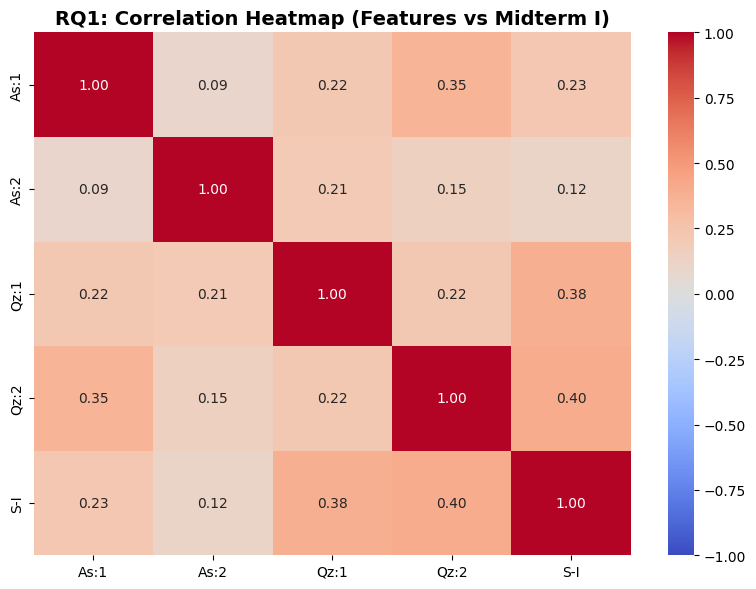

In [20]:
# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_rq1[cols_model1_rq1 + ["S-I"]].corr(), annot=True, fmt=".2f",
            cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("RQ1: Correlation Heatmap (Features vs Midterm I)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

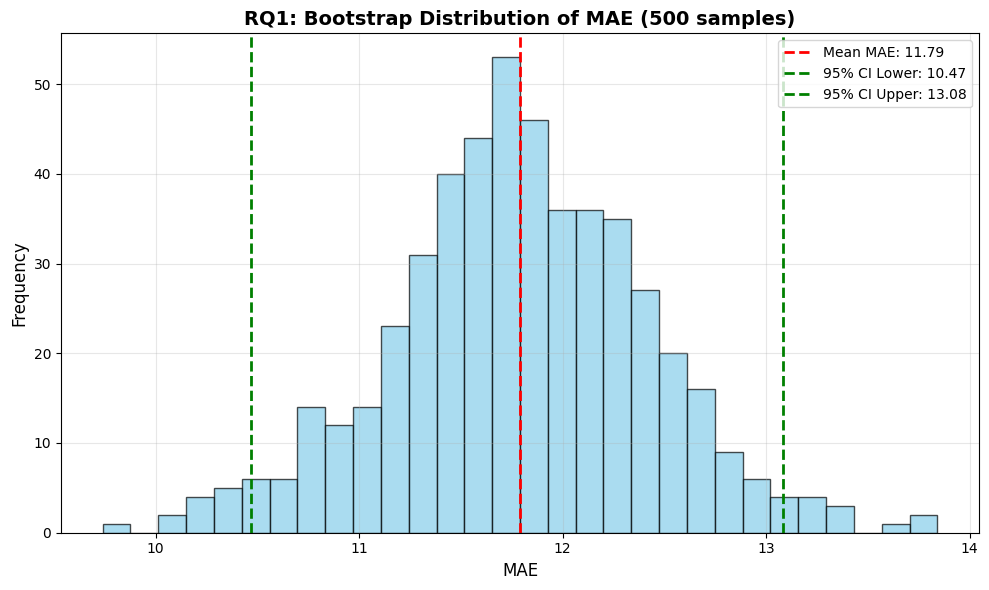

In [21]:
# 2. Bootstrap Distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq1, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean_mae_rq1, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq1:.2f}')
plt.axvline(ci_lower_rq1, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq1:.2f}')
plt.axvline(ci_upper_rq1, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq1:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ1: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

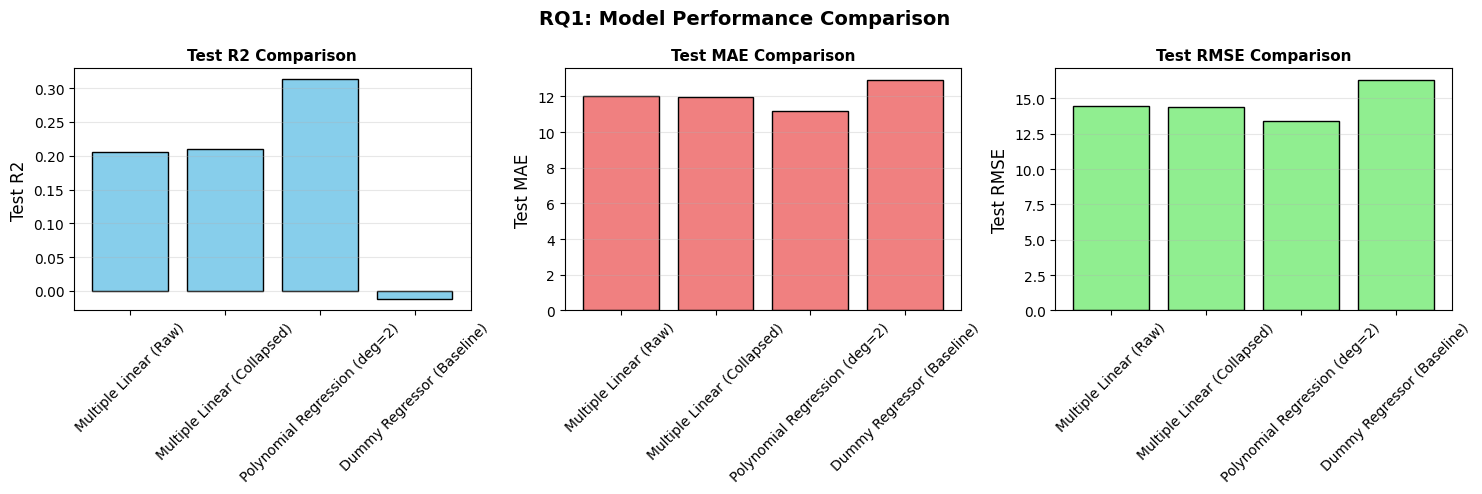

In [22]:
# 3. Model Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics_to_plot = ['Test R2', 'Test MAE', 'Test RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    axes[idx].bar(comparison_rq1['Model'], comparison_rq1[metric], color=color, edgecolor='black')
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('RQ1: Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

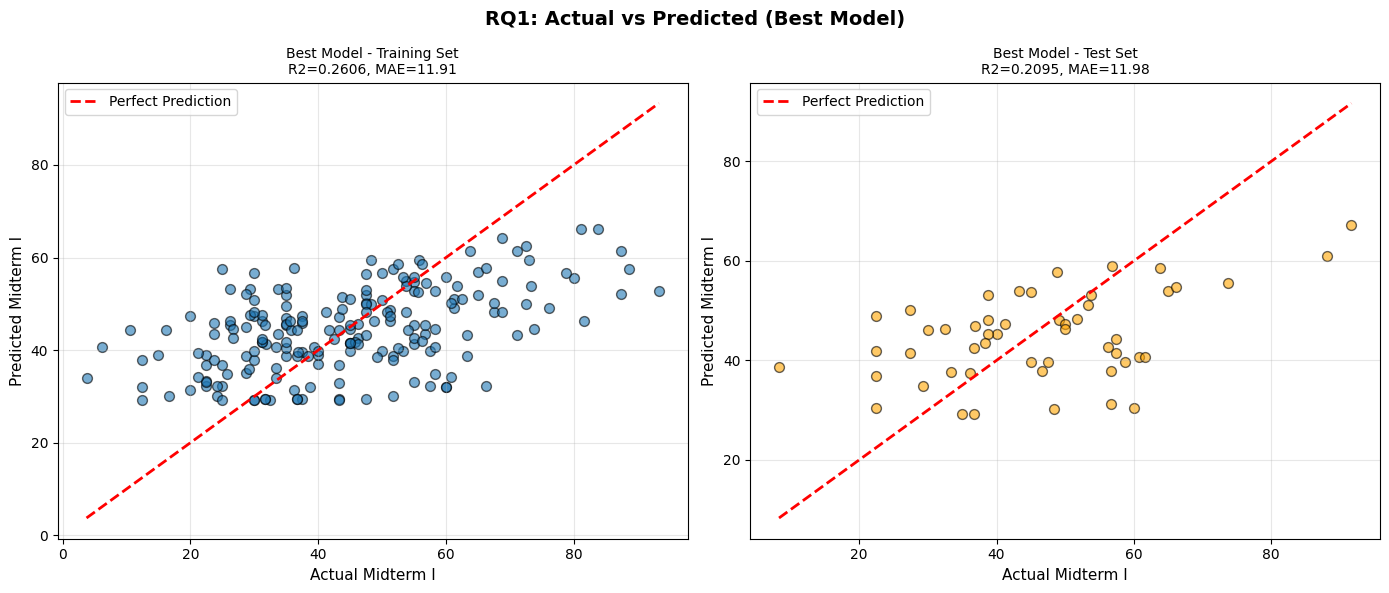


 RQ1 Analysis Complete!


In [ ]:
# 4. Actual vs Predicted for Best Model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training
axes[0].scatter(y2_rq1_train, y2_rq1_pred_train, alpha=0.6, edgecolor='black', s=50)
axes[0].plot([y2_rq1_train.min(), y2_rq1_train.max()],
             [y2_rq1_train.min(), y2_rq1_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Midterm I', fontsize=11)
axes[0].set_ylabel('Predicted Midterm I', fontsize=11)
axes[0].set_title(f'Best Model - Training Set\nR2={metrics2_rq1_train["R2"]:.4f}, MAE={metrics2_rq1_train["MAE"]:.2f}', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Testing
axes[1].scatter(y2_rq1_test, y2_rq1_pred_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1].plot([y2_rq1_test.min(), y2_rq1_test.max()],
             [y2_rq1_test.min(), y2_rq1_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Midterm I', fontsize=11)
axes[1].set_ylabel('Predicted Midterm I', fontsize=11)
axes[1].set_title(f'Best Model - Test Set\nR2={metrics2_rq1_test["R2"]:.4f}, MAE={metrics2_rq1_test["MAE"]:.2f}', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.suptitle('RQ1: Actual vs Predicted (Best Model)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# RQ2: Predicting Midterm II (S-II) Marks

We will assume that we have 3 Assignments, 4 Quizzes, and Sessional I marks. 

In [25]:
df_rq2 = df.dropna(subset=['S-II']).copy()
print(f"Dataset size for RQ2: {len(df_rq2)} rows")
print(f"Features available before Midterm II: As:1, As:2, As:3, Qz:1, Qz:2, Qz:3, Qz:4, S-I")

Dataset size for RQ2: 254 rows
Features available before Midterm II: As:1, As:2, As:3, Qz:1, Qz:2, Qz:3, Qz:4, S-I


In [26]:
# Check correlations
print("\n" + "="*70)
print("Feature Correlations with Midterm II (S-II)")
print("="*70)
cols_for_corr_rq2 = ['As:1', 'As:2', 'As:3', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']
corr_data = df_rq2[cols_for_corr_rq2 + ['S-II']].corr()['S-II'].sort_values(ascending=False)
print(corr_data)


Feature Correlations with Midterm II (S-II)
S-II    1.000000
S-I     0.657011
Qz:4    0.425672
As:3    0.355967
Qz:3    0.292373
Qz:1    0.269226
Qz:2    0.237329
As:2    0.208307
As:1    0.154458
Name: S-II, dtype: float64


### Mutliple Linear Regression (Raw Features) 

In [27]:
cols_model1_rq2 = ['As:1', 'As:2', 'As:3', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']
X1_rq2 = df_rq2[cols_model1_rq2]
y1_rq2 = df_rq2["S-II"]

X1_rq2_train, X1_rq2_test, y1_rq2_train, y1_rq2_test = train_test_split(
    X1_rq2, y1_rq2, test_size=0.20, random_state=42
)

print(f"\nTrain set size: {len(X1_rq2_train)}")
print(f"Test set size: {len(X1_rq2_test)}")

model1_rq2 = LinearRegression()
model1_rq2.fit(X1_rq2_train, y1_rq2_train)

y1_rq2_pred_train = model1_rq2.predict(X1_rq2_train)
y1_rq2_pred_test = model1_rq2.predict(X1_rq2_test)

print("\nCoefficients:")
for col, coef in zip(cols_model1_rq2, model1_rq2.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model1_rq2.intercept_:.4f}")

metrics1_rq2_train = calculate_metrics(y1_rq2_train, y1_rq2_pred_train, X1_rq2_train.shape, "Training")
metrics1_rq2_test = calculate_metrics(y1_rq2_test, y1_rq2_pred_test, X1_rq2_test.shape, "Testing")


Train set size: 203
Test set size: 51

Coefficients:
  As:1: -0.0456
  As:2: 0.0387
  As:3: 0.1171
  Qz:1: -0.0268
  Qz:2: -0.0746
  Qz:3: 0.0747
  Qz:4: 0.1290
  S-I: 0.7602
  Intercept: -6.9898

Training Metrics:
  R2: 0.5116
  RMSE: 15.4585
  MAE: 12.6139
  Adjusted R2: 0.4914

Testing Metrics:
  R2: 0.5045
  RMSE: 15.1086
  MAE: 11.6488
  Adjusted R2: 0.4101


### Multiple Linear Regression (Collapsed Features)

In [28]:
df_rq2["As_Mean"] = df_rq2[["As:1", "As:2", "As:3"]].mean(axis=1)
df_rq2["Qz_Mean"] = df_rq2[["Qz:1", "Qz:2", "Qz:3", "Qz:4"]].mean(axis=1)

cols_model2_rq2 = ["As_Mean", "Qz_Mean", "S-I"]
X2_rq2 = df_rq2[cols_model2_rq2]
y2_rq2 = df_rq2["S-II"]

X2_rq2_train, X2_rq2_test, y2_rq2_train, y2_rq2_test = train_test_split(
    X2_rq2, y2_rq2, test_size=0.20, random_state=42
)

model2_rq2 = LinearRegression()
model2_rq2.fit(X2_rq2_train, y2_rq2_train)

y2_rq2_pred_train = model2_rq2.predict(X2_rq2_train)
y2_rq2_pred_test = model2_rq2.predict(X2_rq2_test)

print("\nCoefficients:")
for col, coef in zip(cols_model2_rq2, model2_rq2.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model2_rq2.intercept_:.4f}")

metrics2_rq2_train = calculate_metrics(y2_rq2_train, y2_rq2_pred_train, X2_rq2_train.shape, "Training")
metrics2_rq2_test = calculate_metrics(y2_rq2_test, y2_rq2_pred_test, X2_rq2_test.shape, "Testing")


Coefficients:
  As_Mean: 0.1132
  Qz_Mean: 0.1023
  S-I: 0.7405
  Intercept: -5.5644

Training Metrics:
  R2: 0.4544
  RMSE: 16.3387
  MAE: 13.3564
  Adjusted R2: 0.4461

Testing Metrics:
  R2: 0.4879
  RMSE: 15.3594
  MAE: 12.6902
  Adjusted R2: 0.4552


### Polynomial Regression (degree=2)

In [29]:
# Use collapsed features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X3_rq2_poly_train = poly.fit_transform(X2_rq2_train)
X3_rq2_poly_test = poly.transform(X2_rq2_test)

model3_rq2 = LinearRegression()
model3_rq2.fit(X3_rq2_poly_train, y2_rq2_train)

y3_rq2_pred_train = model3_rq2.predict(X3_rq2_poly_train)
y3_rq2_pred_test = model3_rq2.predict(X3_rq2_poly_test)

print(f"\nPolynomial features created: {poly.get_feature_names_out(cols_model2_rq2)}")
print(f"Number of features: {X3_rq2_poly_train.shape[1]}")

metrics3_rq2_train = calculate_metrics(y2_rq2_train, y3_rq2_pred_train, X3_rq2_poly_train.shape, "Training")
metrics3_rq2_test = calculate_metrics(y2_rq2_test, y3_rq2_pred_test, X3_rq2_poly_test.shape, "Testing")


Polynomial features created: ['As_Mean' 'Qz_Mean' 'S-I' 'As_Mean^2' 'As_Mean Qz_Mean' 'As_Mean S-I'
 'Qz_Mean^2' 'Qz_Mean S-I' 'S-I^2']
Number of features: 9

Training Metrics:
  R2: 0.4618
  RMSE: 16.2273
  MAE: 13.3122
  Adjusted R2: 0.4367

Testing Metrics:
  R2: 0.4595
  RMSE: 15.7794
  MAE: 13.2344
  Adjusted R2: 0.3409


### Dummy Baseline Regressor

In [30]:
dummy_rq2 = DummyRegressor(strategy='mean')
dummy_rq2.fit(X2_rq2_train, y2_rq2_train)

y_dummy_rq2_train = dummy_rq2.predict(X2_rq2_train)
y_dummy_rq2_test = dummy_rq2.predict(X2_rq2_test)

metrics_dummy_rq2_train = calculate_metrics(y2_rq2_train, y_dummy_rq2_train, None, "Training")
metrics_dummy_rq2_test = calculate_metrics(y2_rq2_test, y_dummy_rq2_test, None, "Testing")


Training Metrics:
  R2: 0.0000
  RMSE: 22.1189
  MAE: 18.6565

Testing Metrics:
  R2: -0.0152
  RMSE: 21.6260
  MAE: 17.3631


### Comparison table 

In [31]:
comparison_rq2 = pd.DataFrame({
    'Model': [
        'Multiple Linear (Raw)',
        'Multiple Linear (Collapsed)',
        'Polynomial Regression (deg=2)',
        'Dummy Regressor (Baseline)'
    ],
    'Train R2': [
        metrics1_rq2_train['R2'],
        metrics2_rq2_train['R2'],
        metrics3_rq2_train['R2'],
        metrics_dummy_rq2_train['R2']
    ],
    'Test R2': [
        metrics1_rq2_test['R2'],
        metrics2_rq2_test['R2'],
        metrics3_rq2_test['R2'],
        metrics_dummy_rq2_test['R2']
    ],
    'Train MAE': [
        metrics1_rq2_train['MAE'],
        metrics2_rq2_train['MAE'],
        metrics3_rq2_train['MAE'],
        metrics_dummy_rq2_train['MAE']
    ],
    'Test MAE': [
        metrics1_rq2_test['MAE'],
        metrics2_rq2_test['MAE'],
        metrics3_rq2_test['MAE'],
        metrics_dummy_rq2_test['MAE']
    ],
    'Train RMSE': [
        metrics1_rq2_train['RMSE'],
        metrics2_rq2_train['RMSE'],
        metrics3_rq2_train['RMSE'],
        metrics_dummy_rq2_train['RMSE']
    ],
    'Test RMSE': [
        metrics1_rq2_test['RMSE'],
        metrics2_rq2_test['RMSE'],
        metrics3_rq2_test['RMSE'],
        metrics_dummy_rq2_test['RMSE']
    ]
})

print("\n", comparison_rq2.to_string(index=False))


                         Model  Train R2   Test R2  Train MAE  Test MAE  Train RMSE  Test RMSE
        Multiple Linear (Raw)  0.511563  0.504507  12.613890 11.648791   15.458494  15.108642
  Multiple Linear (Collapsed)  0.454354  0.487925  13.356429 12.690171   16.338748  15.359384
Polynomial Regression (deg=2)  0.461774  0.459539  13.312184 13.234418   16.227265  15.779352
   Dummy Regressor (Baseline)  0.000000 -0.015166  18.656491 17.363051   22.118879  21.625962


### Best Model Analysis

In [32]:

# Identify best model
best_model_idx = comparison_rq2['Test R2'].idxmax()
best_model_name = comparison_rq2.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model_name}")
print(f"Test R2 = {comparison_rq2.loc[best_model_idx, 'Test R2']:.4f}")
print(f"Test MAE = {comparison_rq2.loc[best_model_idx, 'Test MAE']:.4f}")


Best Model: Multiple Linear (Raw)
Test R2 = 0.5045
Test MAE = 11.6488


### Check for overfitting/underfitting

In [33]:
for idx, model_name in enumerate(comparison_rq2['Model']):
    train_r2 = comparison_rq2.loc[idx, 'Train R2']
    test_r2 = comparison_rq2.loc[idx, 'Test R2']
    diff = train_r2 - test_r2
    
    print(f"\n{model_name}:")
    print(f"Train R2 - Test R2 = {diff:.4f}")
    if diff > 0.1:
        print(f"Possible overfitting (large gap between train and test)")
    elif test_r2 < 0:
        print(f"Model performs worse than baseline (negative R2)")
    elif train_r2 < 0.3 and test_r2 < 0.3:
        print(f"Possible underfitting (low performance on both sets)")
    else:
        print(f"Reasonable performance")


Multiple Linear (Raw):
Train R2 - Test R2 = 0.0071
Reasonable performance

Multiple Linear (Collapsed):
Train R2 - Test R2 = -0.0336
Reasonable performance

Polynomial Regression (deg=2):
Train R2 - Test R2 = 0.0022
Reasonable performance

Dummy Regressor (Baseline):
Train R2 - Test R2 = 0.0152
Model performs worse than baseline (negative R2)


### Bootstrapping analysis

In [34]:
# Determine which model to use for bootstrapping based on best model
if best_model_idx == 0:  # Raw features
    X_boot_train = X1_rq2_train
    y_boot_train = y1_rq2_train
    use_poly = False
elif best_model_idx == 1:  # Collapsed features
    X_boot_train = X2_rq2_train
    y_boot_train = y2_rq2_train
    use_poly = False
else:  # Polynomial
    X_boot_train = X2_rq2_train
    y_boot_train = y2_rq2_train
    use_poly = True

np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq2 = []

print(f"Performing {n_bootstrap} bootstrap samples...")
for i in range(n_bootstrap):
    # Resample with replacement
    indices = np.random.choice(len(X_boot_train), size=len(X_boot_train), replace=True)
    X_boot = X_boot_train.iloc[indices]
    y_boot = y_boot_train.iloc[indices]
    
    # Fit model on bootstrap sample
    if use_poly:
        poly_boot = PolynomialFeatures(degree=2, include_bias=False)
        X_boot_poly = poly_boot.fit_transform(X_boot)
        boot_model = LinearRegression()
        boot_model.fit(X_boot_poly, y_boot)
        y_boot_pred = boot_model.predict(X_boot_poly)
    else:
        boot_model = LinearRegression()
        boot_model.fit(X_boot, y_boot)
        y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq2.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq2 = np.array(bootstrap_maes_rq2)
ci_lower_rq2 = np.percentile(bootstrap_maes_rq2, 2.5)
ci_upper_rq2 = np.percentile(bootstrap_maes_rq2, 97.5)
mean_mae_rq2 = np.mean(bootstrap_maes_rq2)
std_mae_rq2 = np.std(bootstrap_maes_rq2)

print(f"\nBootstrap Results (500 samples):")
print(f"  Mean MAE: {mean_mae_rq2:.4f}")
print(f"  Std Dev MAE: {std_mae_rq2:.4f}")
print(f"  95% Confidence Interval: [{ci_lower_rq2:.4f}, {ci_upper_rq2:.4f}]")

print(f"\nInterpretation:")
print(f"  We are 95% confident that the true MAE of the model lies between")
print(f"  {ci_lower_rq2:.2f} and {ci_upper_rq2:.2f} marks. This means the model's prediction")
print(f"  error for Midterm II is expected to be within this range.")

Performing 500 bootstrap samples...

Bootstrap Results (500 samples):
  Mean MAE: 12.2935
  Std Dev MAE: 0.7162
  95% Confidence Interval: [10.8375, 13.6462]

Interpretation:
  We are 95% confident that the true MAE of the model lies between
  10.84 and 13.65 marks. This means the model's prediction
  error for Midterm II is expected to be within this range.


### Visualizations

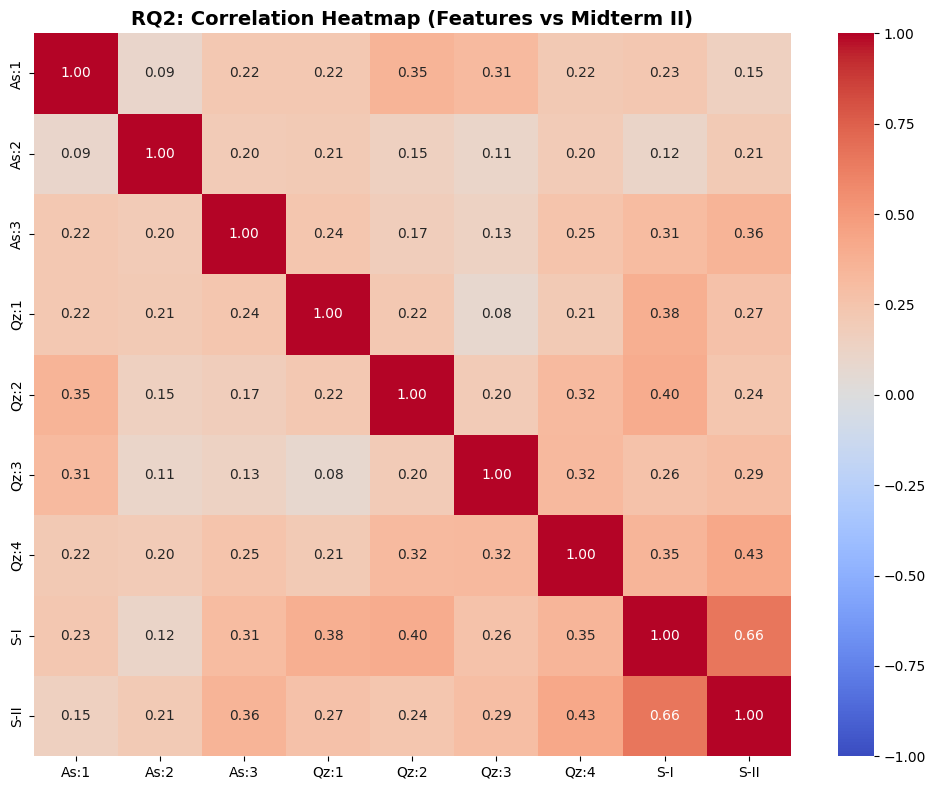

In [35]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_rq2[cols_model1_rq2 + ["S-II"]].corr(), annot=True, fmt=".2f",
            cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("RQ2: Correlation Heatmap (Features vs Midterm II)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

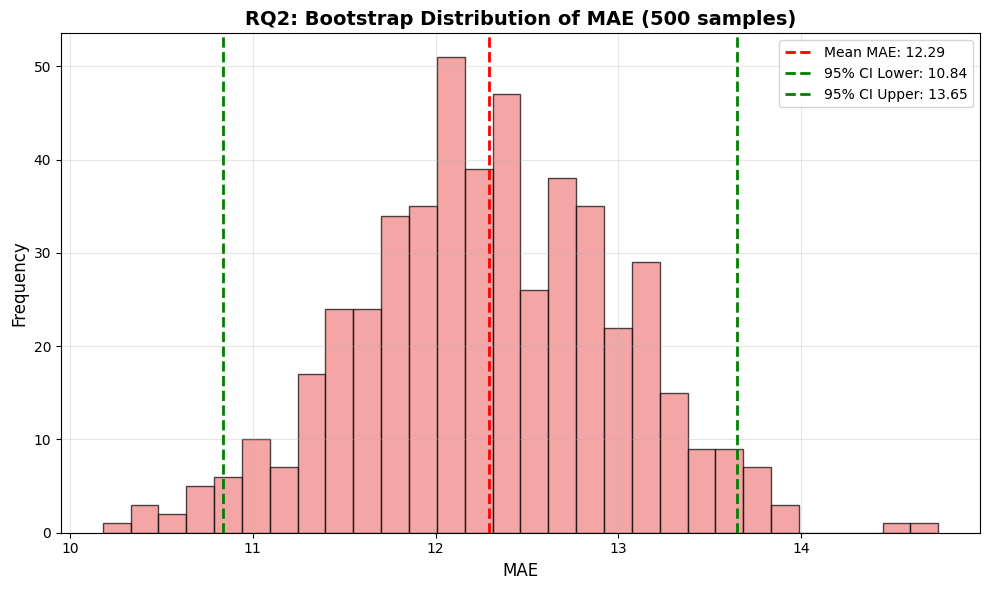

In [36]:
# 2. Bootstrap Distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq2, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
plt.axvline(mean_mae_rq2, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq2:.2f}')
plt.axvline(ci_lower_rq2, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq2:.2f}')
plt.axvline(ci_upper_rq2, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq2:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ2: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

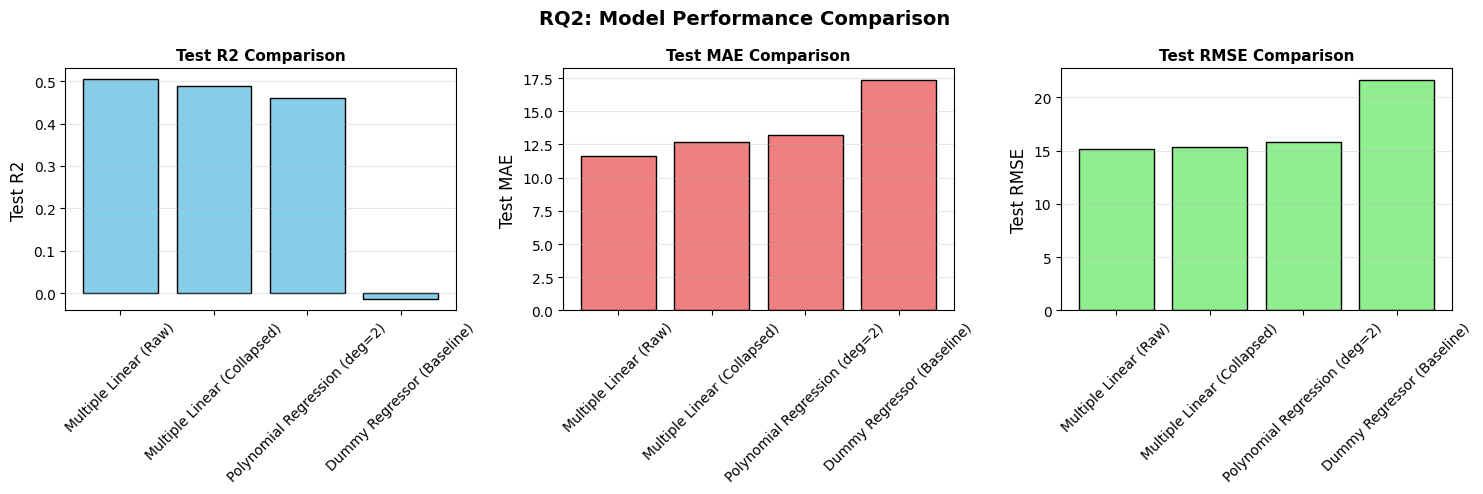

In [37]:
# 3. Model Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics_to_plot = ['Test R2', 'Test MAE', 'Test RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    axes[idx].bar(comparison_rq2['Model'], comparison_rq2[metric], color=color, edgecolor='black')
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('RQ2: Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

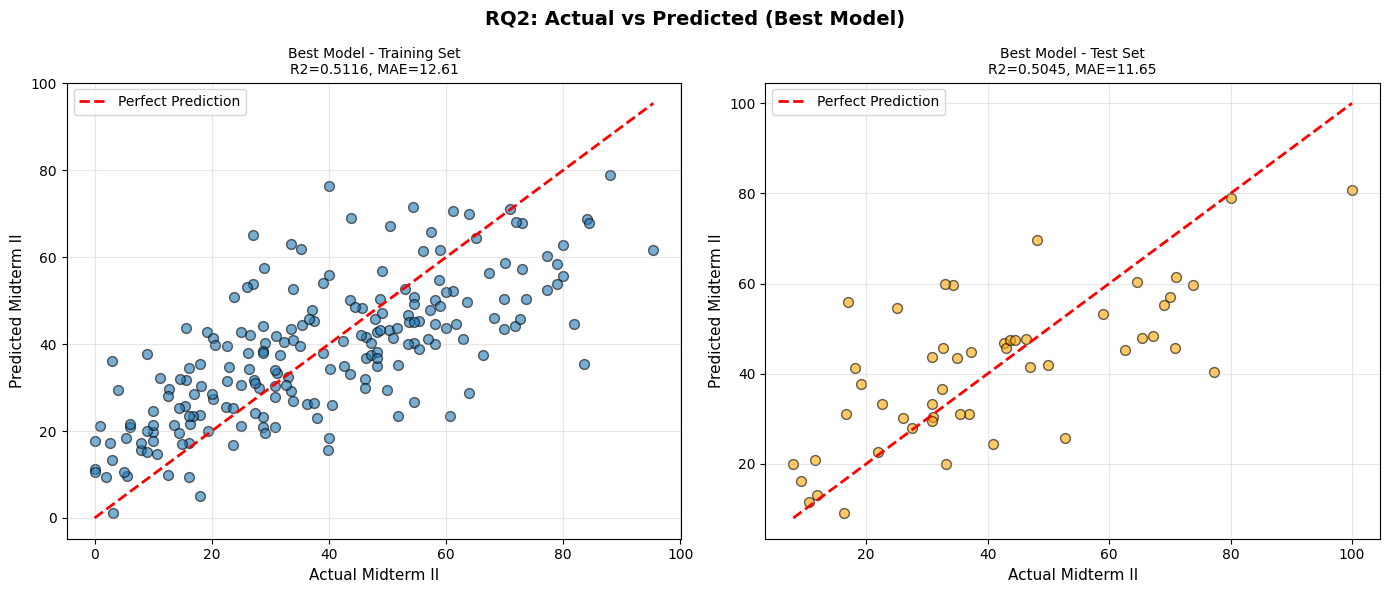

In [38]:
# 4. Actual vs Predicted for Best Model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Determine which predictions to use based on best model
if best_model_idx == 0:
    y_train_pred_best = y1_rq2_pred_train
    y_test_pred_best = y1_rq2_pred_test
    y_train_actual = y1_rq2_train
    y_test_actual = y1_rq2_test
    metrics_train_best = metrics1_rq2_train
    metrics_test_best = metrics1_rq2_test
elif best_model_idx == 1:
    y_train_pred_best = y2_rq2_pred_train
    y_test_pred_best = y2_rq2_pred_test
    y_train_actual = y2_rq2_train
    y_test_actual = y2_rq2_test
    metrics_train_best = metrics2_rq2_train
    metrics_test_best = metrics2_rq2_test
else:
    y_train_pred_best = y3_rq2_pred_train
    y_test_pred_best = y3_rq2_pred_test
    y_train_actual = y2_rq2_train
    y_test_actual = y2_rq2_test
    metrics_train_best = metrics3_rq2_train
    metrics_test_best = metrics3_rq2_test

# Training
axes[0].scatter(y_train_actual, y_train_pred_best, alpha=0.6, edgecolor='black', s=50)
axes[0].plot([y_train_actual.min(), y_train_actual.max()],
             [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Midterm II', fontsize=11)
axes[0].set_ylabel('Predicted Midterm II', fontsize=11)
axes[0].set_title(f'Best Model - Training Set\nR2={metrics_train_best["R2"]:.4f}, MAE={metrics_train_best["MAE"]:.2f}', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Testing
axes[1].scatter(y_test_actual, y_test_pred_best, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1].plot([y_test_actual.min(), y_test_actual.max()],
             [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Midterm II', fontsize=11)
axes[1].set_ylabel('Predicted Midterm II', fontsize=11)
axes[1].set_title(f'Best Model - Test Set\nR2={metrics_test_best["R2"]:.4f}, MAE={metrics_test_best["MAE"]:.2f}', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.suptitle('RQ2: Actual vs Predicted (Best Model)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## RQ 3

In [39]:
# Replacing missing values in Assignments and quizzes 
as_mean = df[["As:1", "As:2", "As:3", "As:4"]].mean(axis=1)
df["As:5"] = df["As:5"].fillna(as_mean)
df["As:6"] = df["As:6"].fillna(as_mean)
qz_mean = df[["Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6"]].mean(axis=1)
df["Qz:7"] = df["Qz:7"].fillna(qz_mean)
df["Qz:8"] = df["Qz:8"].fillna(qz_mean)

### Model 1 - Raw Values with Imputed Data

In [ ]:
# Selecting Raw features 
cols_to_use = [
    "As:1","As:2","As:3","As:4","As:5","As:6",
    "Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7","Qz:8",
    "S-I","S-II"
]

X = df[cols_to_use]
y = df["Final"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
# Metrics 
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n----- Multiple Linear Regression (Raw Columns, Imputed) -----")
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for col, coef in zip(cols_to_use, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nR2: {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


----- Multiple Linear Regression (Raw Columns, Imputed) -----
Intercept: 9.666071228478593

Coefficients:
As:1: -0.0613
As:2: -0.0140
As:3: 0.0291
As:4: 0.0763
As:5: 0.0140
As:6: 0.0902
Qz:1: 0.0173
Qz:2: -0.0686
Qz:3: -0.0687
Qz:4: -0.0115
Qz:5: 0.0066
Qz:6: 0.0729
Qz:7: 0.0464
Qz:8: 0.0013
S-I: 0.1096
S-II: 0.5300

R2: 0.7454
Adjusted R2: 0.2928
RMSE: 10.4076
MAE: 8.4575
MAPE: 25.51%


In [43]:
# Constant Baseline Model
constant_pred = np.full_like(y_test, y_train.mean())

r2_const = r2_score(y_test, constant_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, constant_pred))

print("\n----- Constant Baseline Model -----")
print(f"R2: {r2_const:.4f}")
print(f"RMSE: {rmse_const:.4f}")



----- Constant Baseline Model -----
R2: -0.0011
RMSE: 20.6386


#### Visualization 

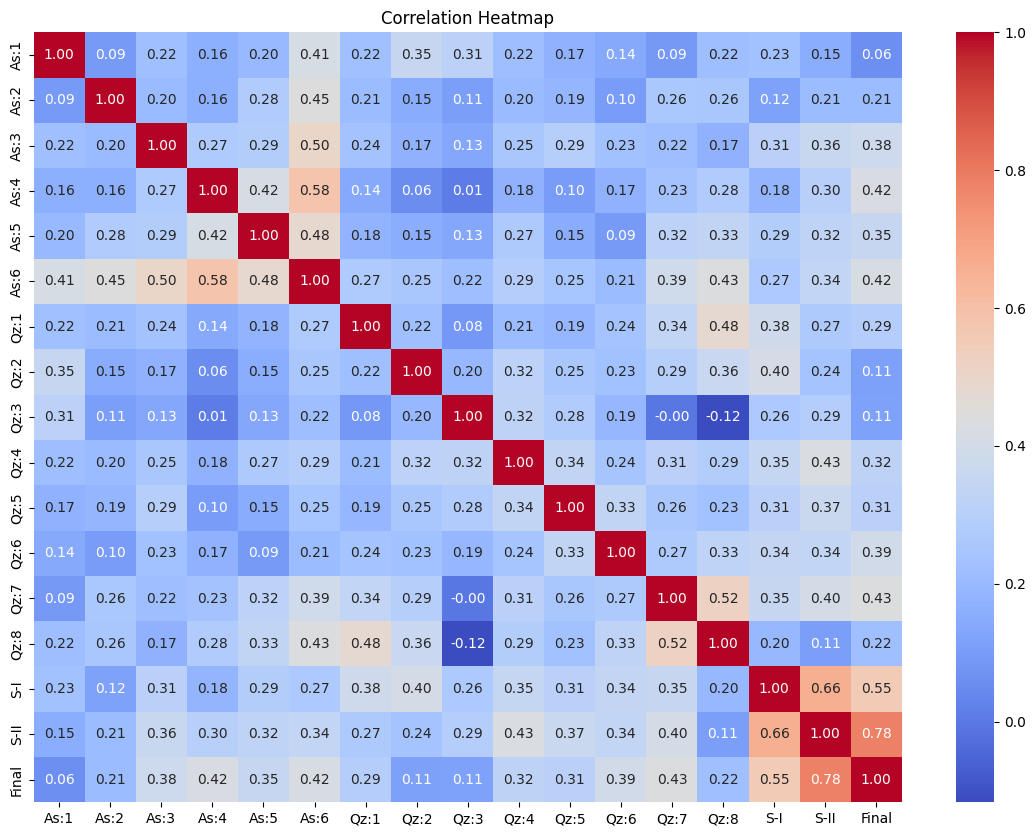

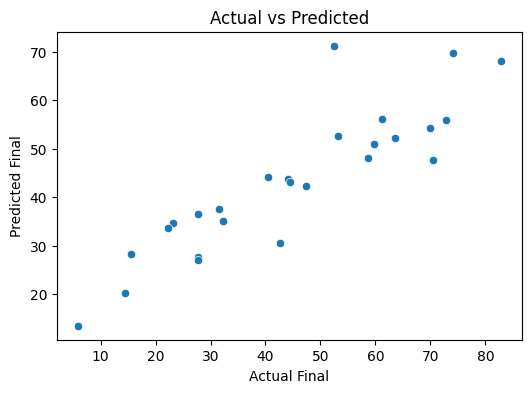

In [44]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Actual vs Predicted scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title("Actual vs Predicted")
plt.show()


### Model 2 - Collapsed Model with Imputed Values (No Quizzes)

In [47]:
as_mean_raw = df[["As:1","As:2","As:3","As:4"]].mean(axis=1)
df["As:5"] = df["As:5"].fillna(as_mean_raw)
df["As:6"] = df["As:6"].fillna(as_mean_raw)

# Create collapsed features 
df["As_Mean"] = df[["As:1","As:2","As:3","As:4"]].mean(axis=1)

# select predictors (no quizzes)

cols_to_use = ["As_Mean", "S-I", "S-II"]
X = df[cols_to_use]
y = df["Final"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2)*(n-1)/(n-k-1))

r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print("\n----- Best-of-Both-Worlds Linear Model (No Quizzes) -----")
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for col, coef in zip(cols_to_use, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nR2: {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


----- Best-of-Both-Worlds Linear Model (No Quizzes) -----
Intercept: 10.594360537235083

Coefficients:
As_Mean: 0.1215
S-I: 0.0743
S-II: 0.5855

R2: 0.6229
Adjusted R2: 0.5715
RMSE: 12.6660
MAE: 10.2966
MAPE: 38.40%


In [ ]:
### constant baseline model
constant_pred = np.full_like(y_test, y_train.mean())
r2_const = r2_score(y_test, constant_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, constant_pred))

print("\n----- Constant Baseline Model -----")
print(f"R2: {r2_const:.4f}")
print(f"RMSE: {rmse_const:.4f}")

#### Visualizations 

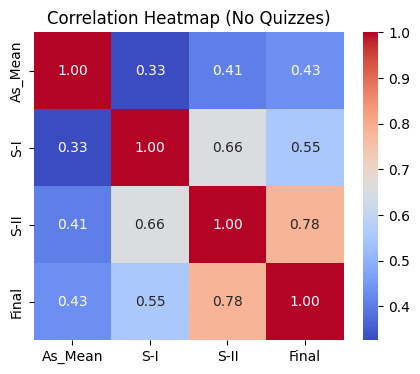

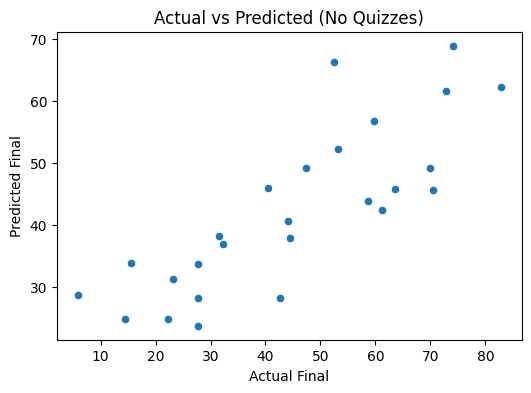

In [50]:
# Correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (No Quizzes)")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title("Actual vs Predicted (No Quizzes)")
plt.show()


### Model 3 - The reason we did not include Quiz means in Model 2

In [51]:
df["As_Mean"] = df[["As:1", "As:2", "As:3", "As:4"]].median(axis=1)
df["Qz_Mean"] = df[["Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6"]].median(axis=1)

# Select features 
cols_to_use = ["As_Mean", "Qz_Mean", "S-I", "S-II"]

X = df[cols_to_use]
y = df["Final"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
# Metrics 
def adjusted_r2(r2, n, k):
    return 1 - ((1-r2)*(n-1)/(n-k-1))

r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n----- Multiple Linear Regression (Collapsed Predictors) -----")
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for col, coef in zip(cols_to_use, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nR2: {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


----- Multiple Linear Regression (Collapsed Predictors) -----
Intercept: 10.790228201597571

Coefficients:
As_Mean: 0.1087
Qz_Mean: -0.0220
S-I: 0.0863
S-II: 0.5957

R2: 0.6218
Adjusted R2: 0.5498
RMSE: 12.6847
MAE: 10.3115
MAPE: 38.23%


In [54]:
# Baseline model 
constant_pred = np.full_like(y_test, y_train.mean())

r2_const = r2_score(y_test, constant_pred)
rmse_const = np.sqrt(mean_squared_error(y_test, constant_pred))

print("\n----- Constant Baseline Model -----")
print(f"R2: {r2_const:.4f}")
print(f"RMSE: {rmse_const:.4f}")



----- Constant Baseline Model -----
R2: -0.0011
RMSE: 20.6386


#### Visualization 

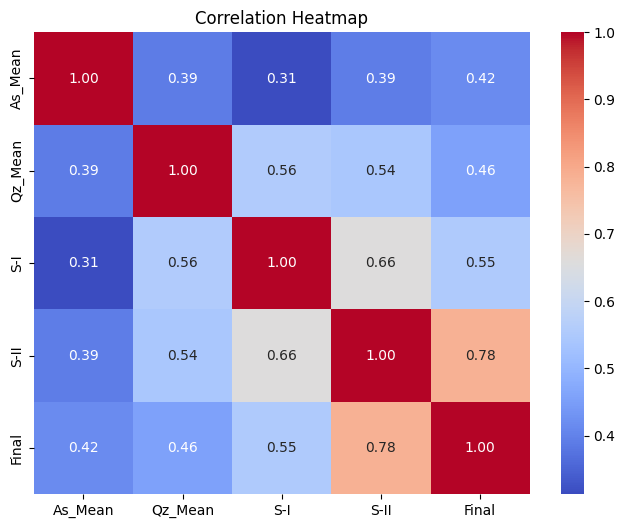

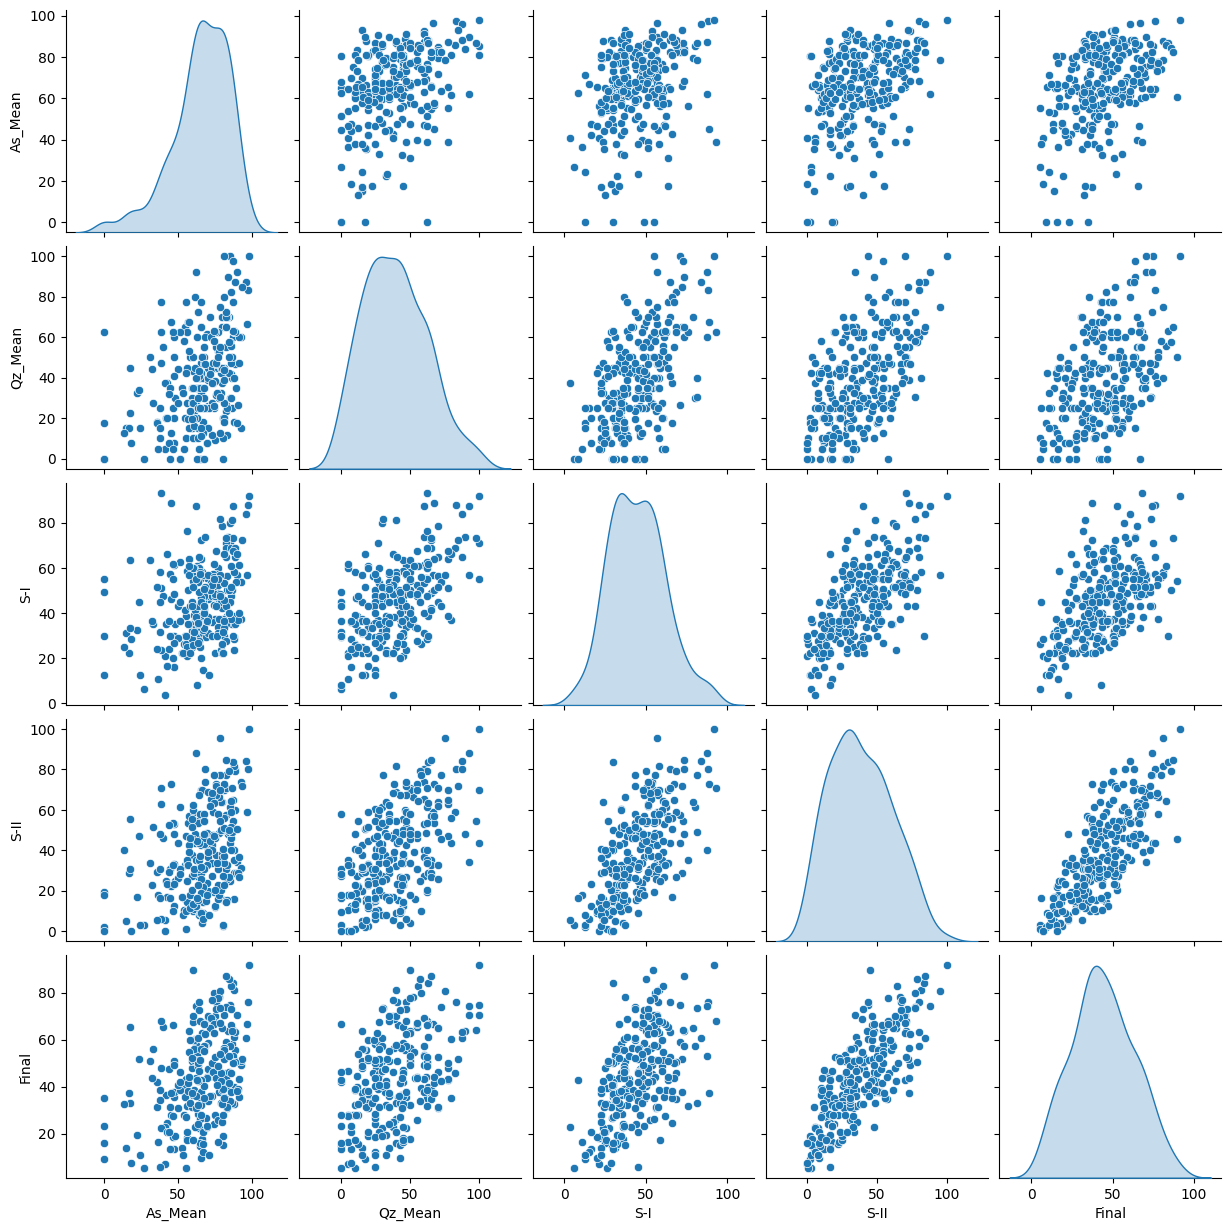

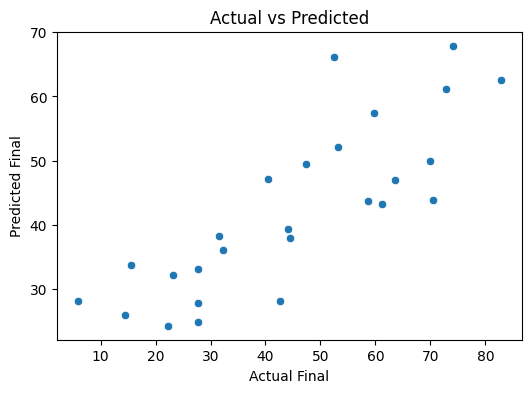

In [55]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[cols_to_use + ["Final"]], diag_kind="kde")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title("Actual vs Predicted")
plt.show()


# Bootstarpping Analysis

In [56]:
# Use the best model from RQ3 (Model 2 - Collapsed Features without Quizzes)
# Recreate the data and train-test split for RQ3 Model 2
df_rq3 = df.copy()

# Impute missing values
as_mean_raw = df_rq3[["As:1","As:2","As:3","As:4"]].mean(axis=1)
df_rq3["As:5"] = df_rq3["As:5"].fillna(as_mean_raw)
df_rq3["As:6"] = df_rq3["As:6"].fillna(as_mean_raw)

# Create collapsed features
df_rq3["As_Mean"] = df_rq3[["As:1","As:2","As:3","As:4"]].mean(axis=1)

# Select predictors (No Quizzes)
cols_rq3 = ["As_Mean", "S-I", "S-II"]
X_rq3 = df_rq3[cols_rq3]
y_rq3 = df_rq3["Final"]

In [57]:
# Train-test split
X_rq3_train, X_rq3_test, y_rq3_train, y_rq3_test = train_test_split(
    X_rq3, y_rq3, test_size=0.10, random_state=42
)

In [59]:
# Perform bootstrapping
np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq3 = []

print(f"Performing {n_bootstrap} bootstrap samples...")

for i in range(n_bootstrap):
    # Resample with replacement from training data
    indices = np.random.choice(len(X_rq3_train), size=len(X_rq3_train), replace=True)
    X_boot = X_rq3_train.iloc[indices]
    y_boot = y_rq3_train.iloc[indices]
    
    # Fit model on bootstrap sample
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    
    # Predict on the bootstrap sample
    y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq3.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq3 = np.array(bootstrap_maes_rq3)
ci_lower_rq3 = np.percentile(bootstrap_maes_rq3, 2.5)
ci_upper_rq3 = np.percentile(bootstrap_maes_rq3, 97.5)
mean_mae_rq3 = np.mean(bootstrap_maes_rq3)
std_mae_rq3 = np.std(bootstrap_maes_rq3)

print(f"\nBootstrap Results (500 samples):")
print(f"  Mean MAE: {mean_mae_rq3:.4f}")
print(f"  Std Dev MAE: {std_mae_rq3:.4f}")
print(f"  95% Confidence Interval: [{ci_lower_rq3:.4f}, {ci_upper_rq3:.4f}]")

print(f"\nInterpretation:")
print(f"  We are 95% confident that the true MAE of the model lies between")
print(f"  {ci_lower_rq3:.2f} and {ci_upper_rq3:.2f} marks. This means the model's prediction")
print(f"  error for Final Exam is expected to be within this range.")
print(f"  The narrow confidence interval suggests stable and reliable model performance.")

Performing 500 bootstrap samples...

Bootstrap Results (500 samples):
  Mean MAE: 9.2813
  Std Dev MAE: 0.4341
  95% Confidence Interval: [8.4961, 10.1489]

Interpretation:
  We are 95% confident that the true MAE of the model lies between
  8.50 and 10.15 marks. This means the model's prediction
  error for Final Exam is expected to be within this range.
  The narrow confidence interval suggests stable and reliable model performance.


#### Visualization of bootstrap distribution

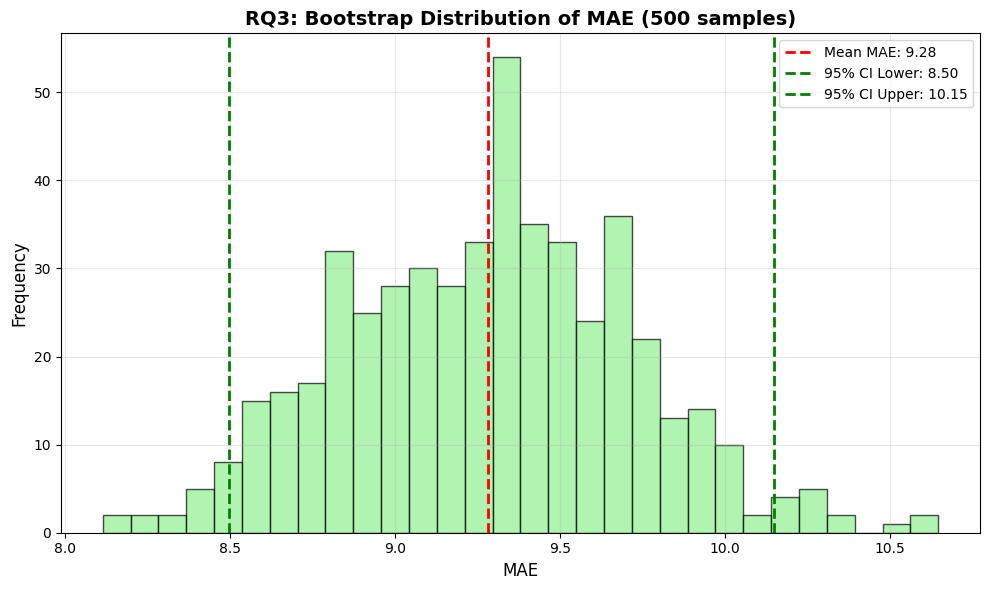

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq3, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.axvline(mean_mae_rq3, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq3:.2f}')
plt.axvline(ci_lower_rq3, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq3:.2f}')
plt.axvline(ci_upper_rq3, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq3:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ3: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Our Conclusion

We would recommend the second model because we believe that the first model is overfitting the training data as the coeffecients of some fields are negative which does not seem to be logical in the real world. Hence we recommend the second model which uses collapsed fields like the average of Assignments, S-I and S-II. The reason we have omitted Quizzes from the model is because the model with Quizz gave us a negative coefficient which means that the quiz data is noisy.